In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import tree, metrics
from sklearn import model_selection

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#This line ensures that the plot is displayed inside the notebook
%matplotlib inline

# this is our global size of label text on the plots
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [2]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(dataset_url, sep=';')

In [3]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

We have 1,599 samples and 12 features, including our target feature

In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Here’s the list of all the features:

- quality (target)
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

In [6]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}

In [7]:
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary

df.loc[:, "quality"] = df.quality.map(quality_mapping)

This dataset has 1599 samples. We keep 1000 samples for training and 599 
as a separate set.

In [8]:
#use sample with frac=1 to shuffle the dataframe we reset the indices since they change after shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 values are selected for testing/validation
df_test = df.tail(599)

In [9]:
# initialize decision tree classifier class with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

In [10]:
# choose the columns you want to train on these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide',
        'total sulfur dioxide','density','pH','sulphates','alcohol']

In [11]:
# train the model on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

we used a max_depth of 3 for the decision tree classifier. and left all other parameters of this model to its default value.

Now, we test the accuracy of this model on the training set and the test set

In [12]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

In [13]:
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

In [14]:
#calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

In [15]:
#calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [16]:
train_accuracy,test_accuracy

(0.581, 0.5726210350584308)

The training and test accuracies are found to be 58.1% and 56.25%. 

In [17]:
clf2 = tree.DecisionTreeClassifier(max_depth=7)

In [18]:
clf2.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [19]:
# generate predictions on the training set
train_predictions = clf2.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf2.predict(df_test[cols])

#calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
                               
#calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
                               
train_accuracy,test_accuracy 

(0.752, 0.6076794657762938)

Now we increase the max_depth to 7 and repeat the process. This gives training accuracy of 
77.7% and test accuracy of 56.3%

In [20]:
# initialize lists to store accuracies for training and test data we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
 # init the model
 clf = tree.DecisionTreeClassifier(max_depth=depth)
 # fit the model on given features
 clf.fit(df_train[cols], df_train.quality)
    
 # create training & test predictions
 train_predictions = clf.predict(df_train[cols])
 test_predictions = clf.predict(df_test[cols])

 # calculate training & test accuracies
 train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
 test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
 
 # append accuracies
 train_accuracies.append(train_accuracy)
 test_accuracies.append(test_accuracy)

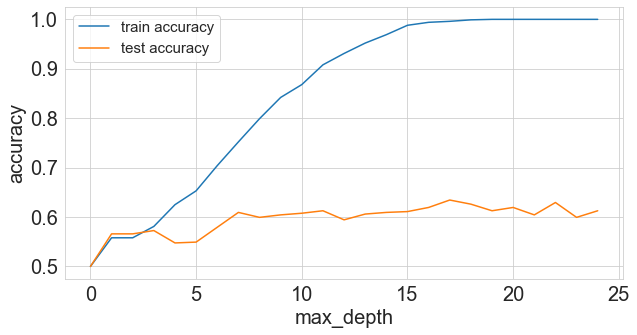

In [21]:
# create two plots using matplotlib and seaborn

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

We see that the best score for test data is obtained when max_depth has a value of 
14. As we keep increasing the value of this parameter, test accuracy remains the 
same or gets worse, but the training accuracy keeps increasing. It means that our 
simple decision tree model keeps learning about the training data better and better 
with an increase in max_depth, but the performance on test data does not improve 
at all. 

**This is called overfitting.**

The model fits perfectly on the training set and performs poorly when it comes to 
the test set. This means that the model will learn the training data well but will not 
generalize on unseen samples. In the dataset above, one can build a model with very 
high max_depth which will have outstanding results on training data, but that kind 
of model is not useful as it will not provide a similar result on the real-world samples 
or live data.

One might argue that this approach isn’t overfitting as the accuracy of the test set 
more or less remains the same. Another definition of overfitting would be when the 
test loss increases as we keep improving training loss. This is very common when 
it comes to neural networks.
Whenever we train a neural network, we must monitor loss during the training time 
for both training and test set. If we have a very large network for a dataset which is 
quite small (i.e. very less number of samples), we will observe that the loss for both 
training and test set will decrease as we keep training. However, at some point, test 
loss will reach its minima, and after that, it will start increasing even though training 
loss decreases further. We must stop training where the validation loss reaches its 
minimum value. 

**Cross Validation Techniques**

We use this kind of (cross-) validation when we have a large amount of data and model 
inference is a time-consuming process.

There are many different ways one can do cross-validation, and it is the most critical step when it comes to building a good machine learning model which is 
generalizable when it comes to unseen data. Choosing the right cross-validation
depends on the dataset you are dealing with, and one’s choice of cross-validation 
on one dataset may or may not apply to other datasets. However, there are a few 
types of cross-validation techniques which are the most popular and widely used. 
These include:

• k-fold cross-validation

• stratified k-fold cross-validation

• hold-out based validation

• leave-one-out cross-validation

• group k-fold cross-validation

Cross-validation is dividing training data into a few parts. We train the model on 
some of these parts and test on the remaining parts.

### k-fold cross-validation

In [23]:
# we create a new column called kfold and fill it with -1
df["kfold"] = -1

# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold
    
# save the new csv with kfold column 
df.to_csv("train_folds.csv", index=False)

### Stratified k-fold

If you have a 
skewed dataset for binary classification with 90% positive samples and only 10% 
negative samples, you don't want to use random k-fold cross-validation.

Using 
simple k-fold cross-validation for a dataset like this can result in folds with all 
negative samples. 

In these cases, we prefer using stratified k-fold cross-validation. 
Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So, 
in each fold, you will have the same 90% positive and 10% negative samples. Thus, 
whatever metric you choose to evaluate, it will give similar results across all folds.


In [24]:
# # import pandas and model_selection module of scikit-learn
# import pandas as pd
# from sklearn import model_selection
# if __name__ == "__main__":
# # Training data is in a csv file called train.csv
# df = pd.read_csv("train.csv")
# # we create a new column called kfold and fill it with -1
# df["kfold"] = -1
# # the next step is to randomize the rows of the data
# df = df.sample(frac=1).reset_index(drop=True)
# # fetch targets
# y = df.target.values
# # initiate the kfold class from model_selection module
# kf = model_selection.StratifiedKFold(n_splits=5)
# # fill the new kfold column
# for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
# df.loc[v_, 'kfold'] = f
# # save the new csv with kfold column
# df.to_csv("train_folds.csv", index=False)

Text(0, 0.5, 'count')

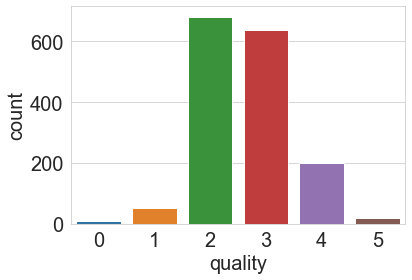

In [25]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Looking at figure we can say that the quality is very much skewed. Some classes 
have a lot of samples, and some don’t have that many. If we do a simple k-fold, we 
won’t have an equal distribution of targets in every fold. Thus, we choose stratified 
k-fold in this case.

The rule is simple. If it’s a standard classification problem, choose stratified k-fold 
blindly.

**Regression.**

The good thing about regression problems is that 
we can use all the cross-validation techniques mentioned above for regression 
problems except for stratified k-fold. That is we cannot use stratified k-fold directly, 
but there are ways to change the problem a bit so that we can use stratified k-fold 
for regression problems. Mostly, simple k-fold cross-validation works for any 
regression problem. However, if you see that the distribution of targets is not 
consistent, you can use stratified k-fold.

To use stratified k-fold for a regression problem, we have first to divide the target 
into bins, and then we can use stratified k-fold in the same way as for classification 
problems. There are several choices for selecting the appropriate number of bins. If 
you have a lot of samples( > 10k, > 100k), then you don’t need to care about the 
number of bins. Just divide the data into 10 or 20 bins. If you do not have a lot of 
samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate 
number of bins.

**Sturge’s rule:Number of Bins = 1 + log2(N)**
Where N is the number of samples you have in your dataset. 

In [26]:
# stratified-kfold for regression

def create_folds(data):
 # we create a new column called kfold and fill it with -1
 data["kfold"] = -1
 
 # the next step is to randomize the rows of the data
 data = data.sample(frac=1).reset_index(drop=True)

# calculate the number of bins by Sturge's rule,I take the floor of the value, you can also just round it
 num_bins = int(np.floor(1 + np.log2(len(data))))
    
 # bin targets
 data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)
 
 # initiate the kfold class from model_selection module
 kf = model_selection.StratifiedKFold(n_splits=5)
 
 # fill the new kfold column note that, instead of targets, we use bins!
 for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
 
 # drop the bins column
 data = data.drop("bins", axis=1)
    
 # return dataframe with folds
 return data

if __name__ == "__main__":
 # we create a sample dataset with 15000 samples 
 # and 100 features and 1 target
 X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

 # create a dataframe out of our numpy arrays
 df = pd.DataFrame(X,columns=[f"f_{i}" for i in range(X.shape[1])])

 df.loc[:, "target"] = y
 # create folds
 df = create_folds(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [27]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-1.052940,1.085821,-0.913791,-0.284332,-1.307960,-0.562826,-0.825270,-0.552355,-0.201170,0.347741,...,0.013042,-1.693452,1.338567,-0.018660,-0.284110,-0.923030,0.189967,1.508650,-124.157194,0
1,0.792889,0.891058,-0.911293,-0.268912,1.825190,-0.074454,0.394064,-0.457943,2.468051,-0.383952,...,0.018906,-0.147237,-0.243697,0.666459,0.162119,-0.188845,0.687079,1.155201,-190.526667,0
2,0.335606,1.141805,0.963092,-0.603603,0.684978,0.431973,-0.855658,0.566242,-1.362129,-0.046231,...,-0.304463,1.688002,-0.616202,1.469016,0.439877,0.754579,-0.366200,-0.445643,82.900243,0
3,-0.290377,0.508406,-1.948884,-0.515833,0.304018,-0.192346,0.276370,-0.105106,-2.896246,-0.745062,...,0.348797,-0.076205,0.346627,-0.931669,-0.249359,-0.044207,-1.559690,-0.259300,112.595633,0
4,-0.060090,1.130443,-1.608669,-0.030704,0.510770,-0.773978,-0.331871,-0.521054,0.970404,0.555983,...,1.283958,-0.292855,0.632966,-1.085184,-0.629400,0.840655,0.319579,0.240255,213.330237,0
